PART 1 — Python + OOP 

In [ ]:
class Book:
    def __init__(self, title, author, genre):
        self.title = title
        self.author = author
        self.genre = genre
        self.is_available = True

    def checkout(self):
        self.is_available = False
        print("Book is checked out")
    
    def returned(self):
        self.is_available = True
        print("Book is returned out")
    
    def __str__(self):
        return(f"{self.title} by {self.author} | {self.genre} | Available:{self.is_available}")

class Library:
    def __init__(self):
        self.books = []

    def add_book(self,title, author, genre):
        new_book = Book(title, author, genre)
        self.books.append(new_book)
    
    
    def show_all(self):
        for book in self.books:
            print(f"{book}\n")
    
    def search_by_genre(self, genre):
       for book in self.books:
           if book.genre == genre:
               print(book.title)

    
    def available_book(self):
        for book in self.books:
            if book.is_available:
                print(book.title)

    def checkout_books(self, title):
        for book in self.books:
            if book.title == title:
                book.checkout()

    def return_book(self, title):
        for book in self.books:
            if book.title == title:
                book.returned()
    
    def __str__(self):
        return f"Library with {len(self.books)} books"
    

books= Library()
books.add_book("Harry potter", "Jk rowling", "Fantasy")
books.add_book("And Then There Were None", "Agatha Christie", "Mystery")
books.add_book("Animal Farm", "George Orwell", "Fantasy")
books.add_book("Pride and Prejudice", "Jane Austen", "Classic Romance")

books.checkout_books("Harry potter")
books.checkout_books("Pride and Prejudice")

books.return_book("Harry potter")

books.search_by_genre("Fantasy")
              

Book is checked out
[<__main__.Book object at 0x000001A924D678C0>, <__main__.Book object at 0x000001A9261807D0>, <__main__.Book object at 0x000001A926180A50>, <__main__.Book object at 0x000001A9262B5F30>]
Book is checked out
[<__main__.Book object at 0x000001A924D678C0>, <__main__.Book object at 0x000001A9261807D0>, <__main__.Book object at 0x000001A926180A50>, <__main__.Book object at 0x000001A9262B5F30>]
Book is returned out
Harry potter
Animal Farm


PART 2 — NumPy + Pandas (40 mins)

You're given this scenario — you're a data analyst at a school. Load this data by creating it yourself as a DataFrame:

In [ ]:
import numpy as np
import pandas as pd
data = {
    "student_id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "name": ["amit", "priya", "rahul", "sneha", "karan",
             "divya", "rohan", "pooja", "arjun", "neha"],
    "math": [85, 92, 78, None, 88, 76, 95, 82, None, 90],
    "science": [78, 88, 82, 91, 75, None, 89, 79, 85, 92],
    "english": [88, 79, 85, 87, 92, 83, 78, None, 88, 85],
    "city": ["Mumbai", "Delhi", "Mumbai", "Chennai", "Delhi",
             "Mumbai", None, "Chennai", "Delhi", "Mumbai"]
}

df = pd.DataFrame(data)
print(df.shape)
print(df.info())
print(df.isnull().sum())

df["math"]=df["math"].fillna(df["math"].median())
df["science"]=df["science"].fillna(df["science"].median())
df["english"]=df["english"].fillna(df["english"].median())

df["city"]=df["city"].fillna(df["city"].mode()[0])  #mode() returns a Series, 
                                                    #not a single value. You need [0] to extract the actual most frequent value.
                                                    #You got this right on Day 7 — don't lose it now.

def get_grade(avg):
    if avg >= 90: return "A"
    elif avg >= 80: return "B"
    elif avg >= 70: return "C"
    else: return "D"


df["total"]=df[["math","english","science"]].sum(axis=1)
df["average"]=df[["math","english","science"]].mean(axis=1)
df["grade"] = df["average"].apply(get_grade)

df = df.sort_values("total",ascending=False).reset_index(drop=True)
print(df)

print(df.loc[0:2,("total","name")])

# Your version — value_counts on average makes no sense:
#print(df.groupby("city")["average"].value_counts())

# Correct:
print(df.groupby("city")["average"].mean())
df.to_csv("school_result.csv")


(10, 6)
<class 'pandas.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  10 non-null     int64  
 1   name        10 non-null     str    
 2   math        8 non-null      float64
 3   science     9 non-null      float64
 4   english     9 non-null      float64
 5   city        9 non-null      str    
dtypes: float64(3), int64(1), str(2)
memory usage: 612.0 bytes
None
student_id    0
name          0
math          2
science       1
english       1
city          1
dtype: int64
   student_id   name  math  science  english     city  total    average
0          10   neha  90.0     92.0     85.0   Mumbai  267.0  89.000000
1           4  sneha  86.5     91.0     87.0  Chennai  264.5  88.166667
2           7  rohan  95.0     89.0     78.0      NaN  262.0  87.333333
3           9  arjun  86.5     85.0     88.0    Delhi  259.5  86.500000
4           2  priya  92.0     88.0  

PART 3 — Visualization (30 mins)

C:\Users\katiy\AppData\Local\Temp\ipykernel_21756\1885070381.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["name"], y=df["total"],data=df, palette="Set2", ax=axes[0])
C:\Users\katiy\AppData\Local\Temp\ipykernel_21756\1885070381.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["city"], data=df, palette="Set2", ax=axes[2])
C:\Users\katiy\AppData\Local\Temp\ipykernel_21756\1885070381.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["city"], y=df["average"],data=df, palette="Set2", ax=axes[4])
C:\Users\katiy\AppDa

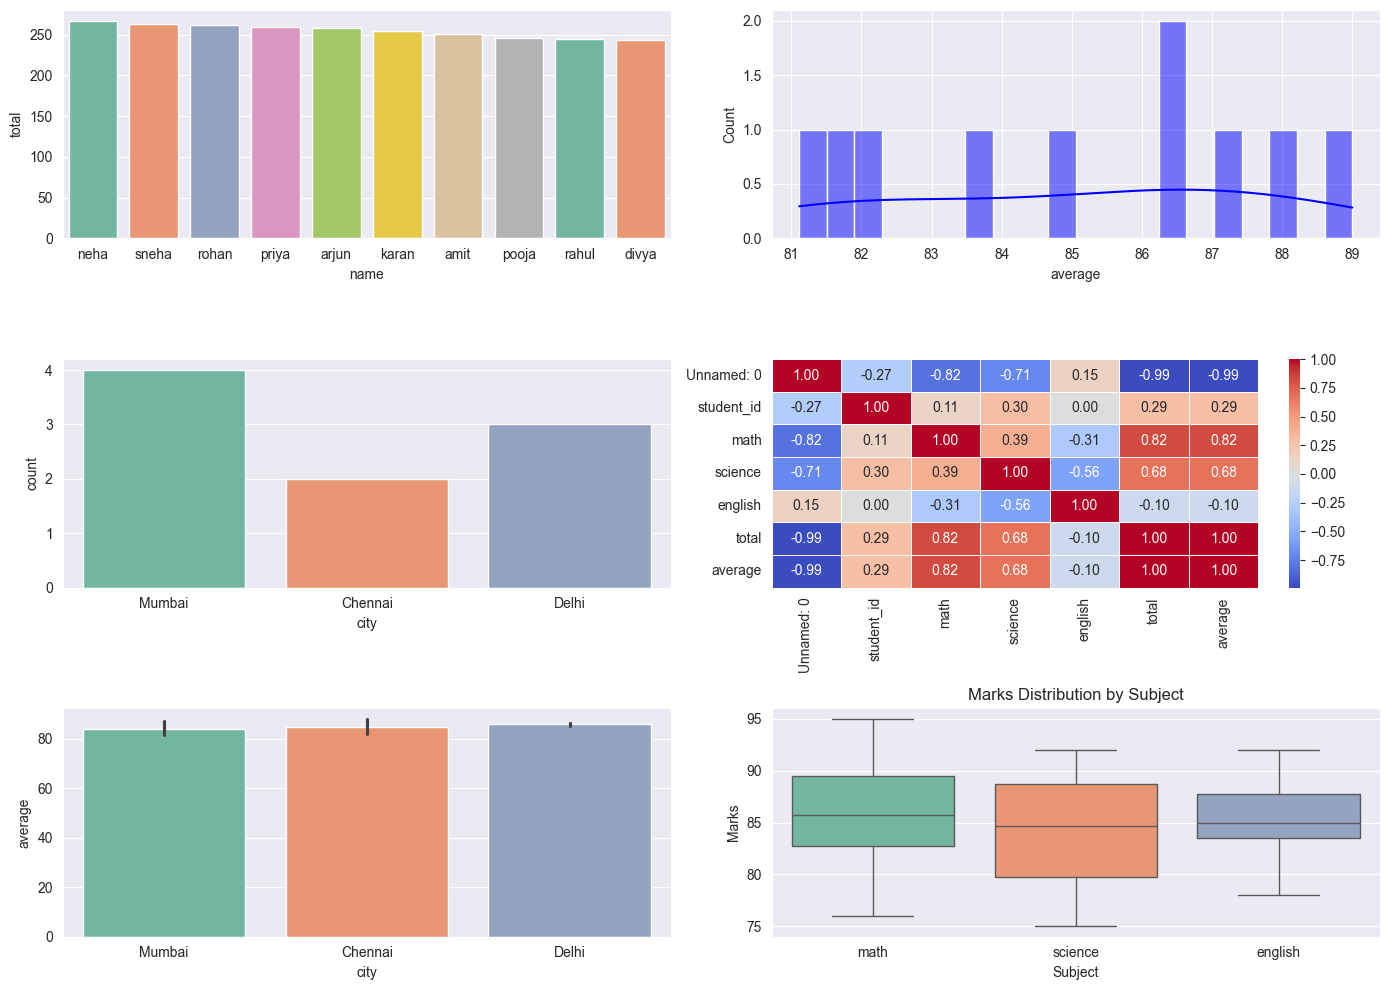

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("school_result.csv")

sns.set_style('darkgrid')

fig, axes = plt.subplots(3,2, figsize=(14,10))
axes =axes.flatten()

sns.barplot(x=df["name"], y=df["total"],data=df, palette="Set2", ax=axes[0])
sns.histplot(x=df["average"], kde=True,data=df, bins=20, color="blue", ax=axes[1])
sns.countplot(x=df["city"], data=df, palette="Set2", ax=axes[2])
sns.heatmap(data=df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[3])
sns.barplot(x=df["city"], y=df["average"],data=df, palette="Set2", ax=axes[4])

marks_df = df[["math", "science", "english"]].melt(var_name="Subject", value_name="Marks")
sns.boxplot(x="Subject", y="Marks", data=marks_df, palette="Set2", ax=axes[5])
axes[5].set_title("Marks Distribution by Subject")

plt.tight_layout()
plt.show()



melt() is a new function — it converts multiple columns into rows. So instead of three separate columns, you get one column called Subject and one called Marks. Seaborn can then group by Subject automatically.